<span style="display:block;text-align:center;margin-right:105px"><img src="../../media/logos/logo-vertical.png" width="200"/></span>

# Section 5: Modelling & Simulation Solutions

---

## Exercise 1: Partial State Update Blocks

Given the following policy function `p_example`, state update function `s_example`, and list of partial state update blocks `partial_state_update_blocks`, answer the following questions:

In [1]:
def p_example(params, substep, state_history, previous_state):
    return {'example_signal': 1}
    
def s_example(params, substep, state_history, previous_state, policy_input):
    example_signal = policy_input['example_signal']
    return 'example_state', example_signal

partial_state_update_blocks = [
    {
        'policies': {
            'example_policy': p_example
        },
        'variables': {
            'example_state': s_example
        }
    }
]

### 1. After one timestep, what will the value of the state variable `example_state` be?

*Answer here in the markdown cell:*

**Solution:**

It will be `1`, the same value as the policy signal `example_signal`.

### 2. How many substeps will the timestep have?

*Answer here in the markdown cell:*

**Solution:**

There will be one substep, because there is one partial state update block (if there is only one state update block, it really isn't partial anymore).

## Exercise 2: Differential Specification

Given the following differential specification diagram, with two policy functions `p_example_1` and `p_example_2`, two state update functions `s_example_1` and `s_example_2`, and two states `state_1` and `state_2`, complete the following exercises and questions, assuming the two policy functions return the same signal key value pair of `{'example_signal': 1}`:

<center>
<img src="./images/s5-exercise-diff-spec.png"
     alt="Exercise diff. spec."
     style="width: 60%;" />
</center>

### 1. Complete the two policy functions and state update functions.

In [ ]:
# The following functions are incomplete - fill in the gaps and run the cell

# Fill in function arguments
def p_example_1():
    # Fill in return value
    return {}

# Fill in function arguments
def p_example_2():
    # Fill in return value
    return {}

# Fill in function arguments
def s_example_1():
    # Fill in policy signal key
    new_state = policy_input['']
    # Fill in return value
    return '', new_state

# Fill in function arguments
def s_example_2():
    # Fill in policy signal key
    new_state = policy_input['']
    # Fill in return value
    return '', new_state

**Solution:**

In [2]:
# The following functions are incomplete - fill in the gaps and run the cell

# Fill in function arguments
def p_example_1(params, substep, state_history, previous_state):
    # Fill in return value
    return {'example_signal': 1}

# Fill in function arguments
def p_example_2(params, substep, state_history, previous_state):
    # Fill in return value
    return {'example_signal': 1}

# Fill in function arguments
def s_example_1(params, substep, state_history, previous_state, policy_input):
    # Fill in policy signal key
    # This was a tricky one! We expected you to catch the mistake, and correctly comment out the policy input to match the differential spec. diagram.
    #new_state = policy_input['example_signal']
    # Fill in return value
    return 'state_1', 0

# Fill in function arguments
def s_example_2(params, substep, state_history, previous_state, policy_input):
    # Fill in policy signal key
    new_state = policy_input['example_signal']
    # Fill in return value
    return 'state_2', new_state

### 2. Fill in the partial state update block to properly represent the differential specification.

In [ ]:
# The following statement is incomplete - fill in the gaps and run the cell

partial_state_update_blocks = [
    {
        'policies': {}, # Fill in policies
        'variables': { # Fill in state update functions
            'state_1': ,
            'state_2':
        }
    }
]

**Solution:**

In [3]:
partial_state_update_blocks = [
    {
        'policies': {
            'p1': p_example_1,
            'p2': p_example_2
        }, # Fill in policies
        'variables': { # Fill in state update functions
            'state_1': s_example_1,
            'state_2': s_example_2
        }
    }
]

### 3. What happens when two policy functions return the same signal key, and what signal value would be passed to the state update function `s_example_2` (note the assumptions)?

*Answer here in the markdown cell:*

**Solution:**

When two policy functions return the same signal key, the signal values are aggregated. The signal value that would be passed to `s_example_2` would be `1+1=2`.

## Exercise 3: Simulation Data Manipulation and Analysis

Given the Pandas dataframe `df` from our section 5 ecosystem model simulation, complete the following exercises and questions using Pandas data manipulation where necessary:

In [5]:
import pandas as pd

df = pd.read_csv('exercise.csv')
df

,Unnamed: 0,population,food,simulation,subset,run,substep,timestep
0,0,50,1000.00,0,0,1,0,0
1,1,60,1009.50,0,0,1,1,1
2,2,71,1018.90,0,0,1,1,2
3,3,82,1028.19,0,0,1,1,3
4,4,93,1037.37,0,0,1,1,4
...,...,...,...,...,...,...,...,...
797,797,1102,902.16,1,0,1,1,396
798,798,1101,901.14,1,0,1,1,397
799,799,1100,900.13,1,0,1,1,398
800,800,1099,899.13,1,0,1,1,399


### 1. What is the **maximum** food supply for simulation `1`?

In [ ]:
# The following statements are incomplete - fill in the gaps and run the cell
df_simulation_1 = df.query('')
df_simulation_1[''].max()

**Solution:**

In [6]:
df_simulation_1 = df.query('simulation == 1')
df_simulation_1['food'].max()

1499.7199999999998

### 2. What is the **difference** between the maximum population for simulation `0` and `1`?

In [ ]:
# The following statements are incomplete - fill in the gaps and run the cell
max_population_simulation_0 = df.query('')['population'].max()
max_population_simulation_1 = df.query('')['population'].max()

max_population_simulation_0 - max_population_simulation_1

**Solution:**

In [7]:
max_population_simulation_0 = df.query('simulation == 0')['population'].max()
max_population_simulation_1 = df.query('simulation == 1')['population'].max()

max_population_simulation_0 - max_population_simulation_1

1133

### 3. Using a Plotly line chart, plot the food supply **rate of change** over time for simulation `1`, using the Pandas `diff()` method.

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"

# The following statements are incomplete - fill in the gaps and run the cell
diff_df = df.query('simulation == 1').copy()
diff_df['food_diff'] = diff_df[''].diff()
diff_df.plot(kind='', x='', y=[''])

**Solution:**

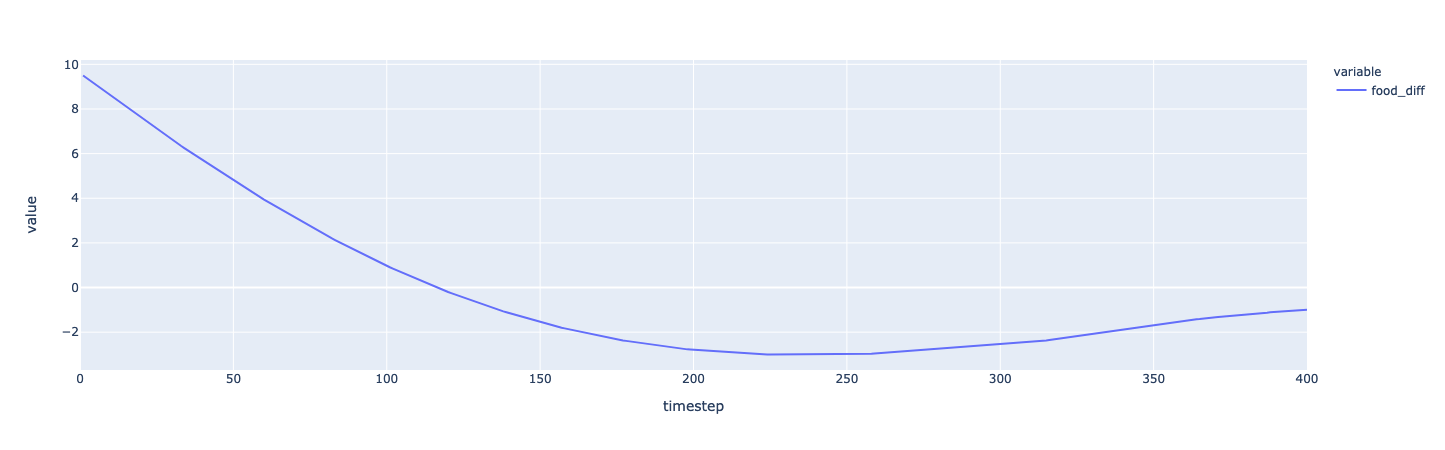

In [10]:
import pandas as pd
pd.options.plotting.backend = "plotly"

diff_df = df.query('simulation == 1').copy()
diff_df['food_diff'] = diff_df['food'].diff()
diff_df.plot(kind='line', x='timestep', y=['food_diff'])

### 4. What does the above plot tell you about the food growth over time? (Hint: the value was the **rate of change** of the food supply)

*Answer here in the markdown cell:*

**Solution:**

The food is growing at a slower and slower rate until timestep `117`, where the rate of food growth becomes negative i.e. the food supply starts decreasing.

<br/><br/><br/>
# Well done!
<br/><br/><br/><br/>